In [ ]:
#IMPORTING THE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [ ]:
#first 5 observations
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#last 5 observations
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#rows and columns
df.shape

(25, 2)

In [ ]:
#more information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#checking missing values in the data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#there is no missing data in the set

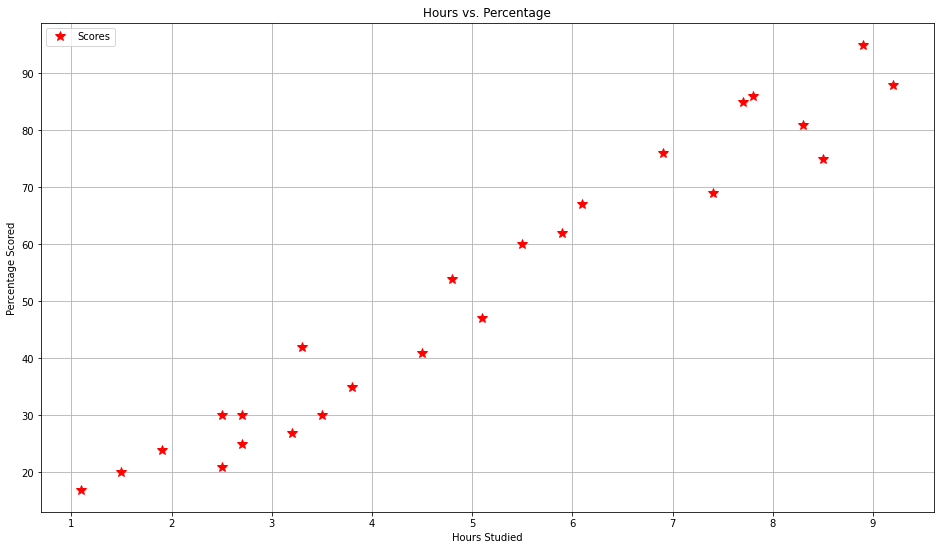

In [ ]:
#plotting the dataset
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x="Hours", y="Scores", style="*", color="red", markersize=10)
plt.title("Hours vs. Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

In [ ]:
#FROM THE GRAPH ABOVE, WE CAN OBSERVE THAT THERE IS A LINEAR RELATION BETWEEN THE 'HOURS STUDIED' AND THE 'PERCENTAGE SCORED'

#correlation between the variables:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#DATA PREPARATION

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#using iloc function, we will divide the data
X= df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
#test size 0.2 = dividing the data into 80-20 ratio
#random state is used to pickup the values randomly (setting it to 0 means no randomness)

In [ ]:
#TRAINING THE ALGORITHM

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

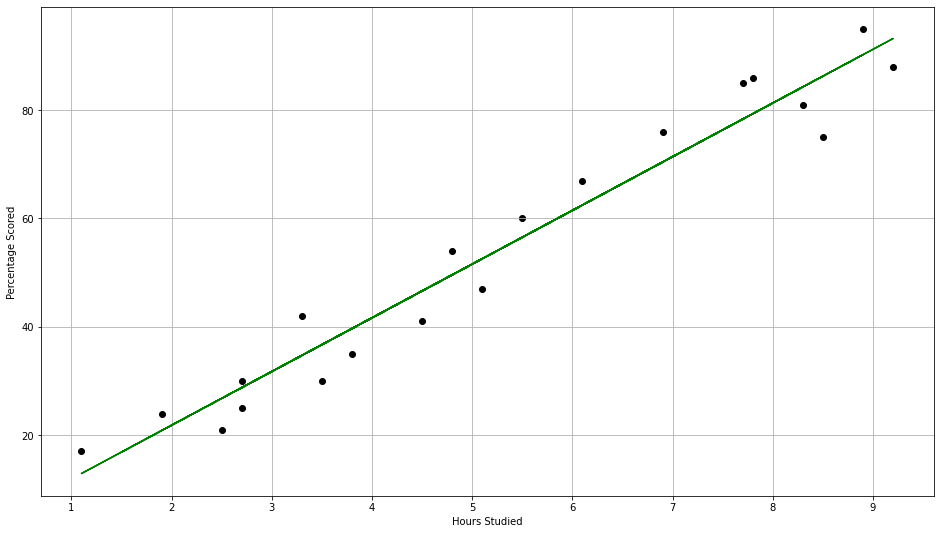

In [ ]:
#VISUALIZING THE MODEL

#plotting for the training data
line = model.coef_*X + model.intercept_

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train,y_train, color="black")
plt.plot(X, line, color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

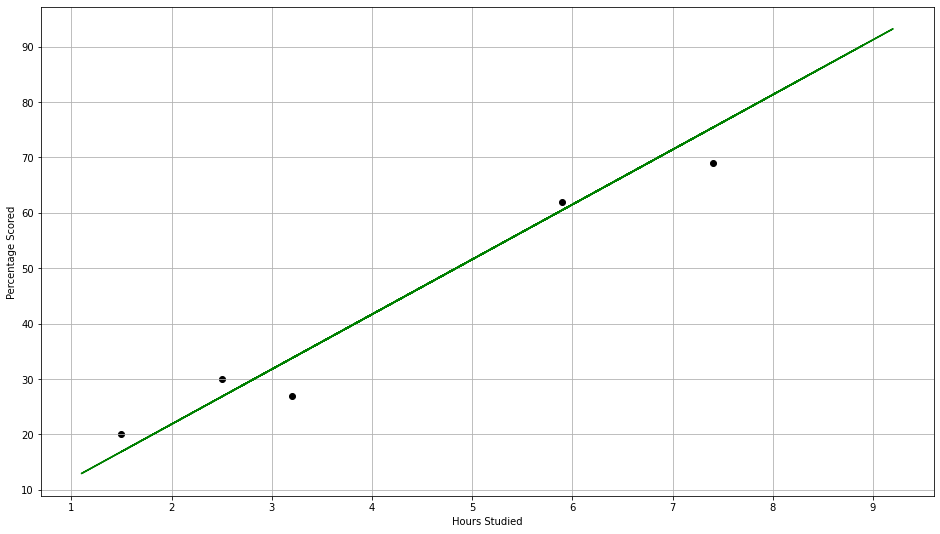

In [ ]:
#plotting for testing data
plt.rcParams['figure.figsize']=[16,9]
plt.scatter(X_test, y_test, color="black")
plt.plot(X, line, color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

In [ ]:
#MAKING PREDICTIONS
print(X_test) #testing data in hours
y_pred = model.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing Actual Vs Predicted
comp = pd.DataFrame({"Actual":[y_test], "Predicted":[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [ ]:
#Testing with our own data
hours = input("input hours here: ")
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for", hours, "hours is ", own_pred[0])

input hours here: 9.25
The predicted score if a person studies for 9.25 hours is  [93.69173249]


In [ ]:
#Evaluating the model

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error:  4.183859899002982
